# Creating Tars in WebDataset Format

In [12]:
rm images-*.tar

(venv) 

: 1

In [13]:
tar cf - --sort=name images | tarp split -c 20 -

[info] version 2021-03-04T11:06:08-08:00 false
[progress] # source -
[progress] # shard split-000000.tar
[progress] # shard split-000001.tar
[progress] # shard split-000002.tar
[progress] # shard split-000003.tar
[progress] # shard split-000004.tar
[progress] # shard split-000005.tar
[progress] # shard split-000006.tar
[progress] # shard split-000007.tar
[progress] # shard split-000008.tar
[progress] # shard split-000009.tar
[progress] # shard split-000010.tar
[progress] # shard split-000011.tar
[progress] # shard split-000012.tar
[progress] # shard split-000013.tar
[progress] # shard split-000014.tar
[progress] # shard split-000015.tar
[progress] # shard split-000016.tar
[progress] # shard split-000017.tar
[progress] # shard split-000018.tar
[progress] # shard split-000019.tar
[progress] # shard split-000020.tar
[progress] # shard split-000021.tar
[progress] # shard split-000022.tar
[progress] # shard split-000023.tar
[progress] # shard split-000024.tar
[progress] # shard split-000025

: 1

In [14]:
ls split-*.tar | rename 's/split-/images-/'

(venv) 

: 1

In [15]:
tar tf images-000004.tar | head

images/Image_0080.jpg
images/Image_0081.jpg
images/Image_0082.jpg
images/Image_0083.jpg
images/Image_0084.jpg
images/Image_0085.jpg
images/Image_0086.jpg
images/Image_0087.jpg
images/Image_0088.jpg
images/Image_0089.jpg
tar: write error
(venv) 

: 1

In [22]:
cat binarize.py

import webdataset as wds
import numpy as np
import sys

source = wds.WebDataset(sys.argv[1]).decode("rgb")
sink = wds.TarWriter(sys.argv[2])

for sample in source:
    image = np.mean(sample["jpg"], 2)
    binarized = (image > 0.5).astype(float)
    sink.write({
        "__key__": sample["__key__"],
        "png": binarized
    })
(venv) 

: 1

In [23]:
source venv/bin/activate

(venv) 

: 1

In [30]:
for shard in {000000..000025}; do
    echo $shard
    python3 binarize.py images-$shard.tar temp.tar && mv temp.tar binarized-$shard.tar
done

000000
000001
000002
000003
000004
000005
000006
000007
000008
000009
000010
000011
000012
000013
000014
000015
000016
000017
000018
000019
000020
000021
000022
000023
000024
000025
(venv) 

: 1

In [25]:
tar tvf binarized-000000.tar

-r--r--r-- bigdata/bigdata 3943 2021-08-25 07:55 images/Image_0000.png
-r--r--r-- bigdata/bigdata 18066 2021-08-25 07:55 images/Image_0001.png
-r--r--r-- bigdata/bigdata  7475 2021-08-25 07:55 images/Image_0002.png
-r--r--r-- bigdata/bigdata  7515 2021-08-25 07:55 images/Image_0003.png
-r--r--r-- bigdata/bigdata  7463 2021-08-25 07:55 images/Image_0004.png
-r--r--r-- bigdata/bigdata  7463 2021-08-25 07:55 images/Image_0005.png
-r--r--r-- bigdata/bigdata  7463 2021-08-25 07:55 images/Image_0006.png
-r--r--r-- bigdata/bigdata  7465 2021-08-25 07:55 images/Image_0007.png
-r--r--r-- bigdata/bigdata 11127 2021-08-25 07:55 images/Image_0008.png
-r--r--r-- bigdata/bigdata 14106 2021-08-25 07:55 images/Image_0009.png
-r--r--r-- bigdata/bigdata 20434 2021-08-25 07:55 images/Image_0010.png
-r--r--r-- bigdata/bigdata 10716 2021-08-25 07:55 images/Image_0011.png
-r--r--r-- bigdata/bigdata 41301 2021-08-25 07:55 images/Image_0012.png
-r--r--r-- bigdata/bigdata 34712 2021-08-25 07:55 images/Image_00

: 1

In [26]:
mkdir -p arch
archivemount binarized-000000.tar arch

(venv) (venv) 

: 1

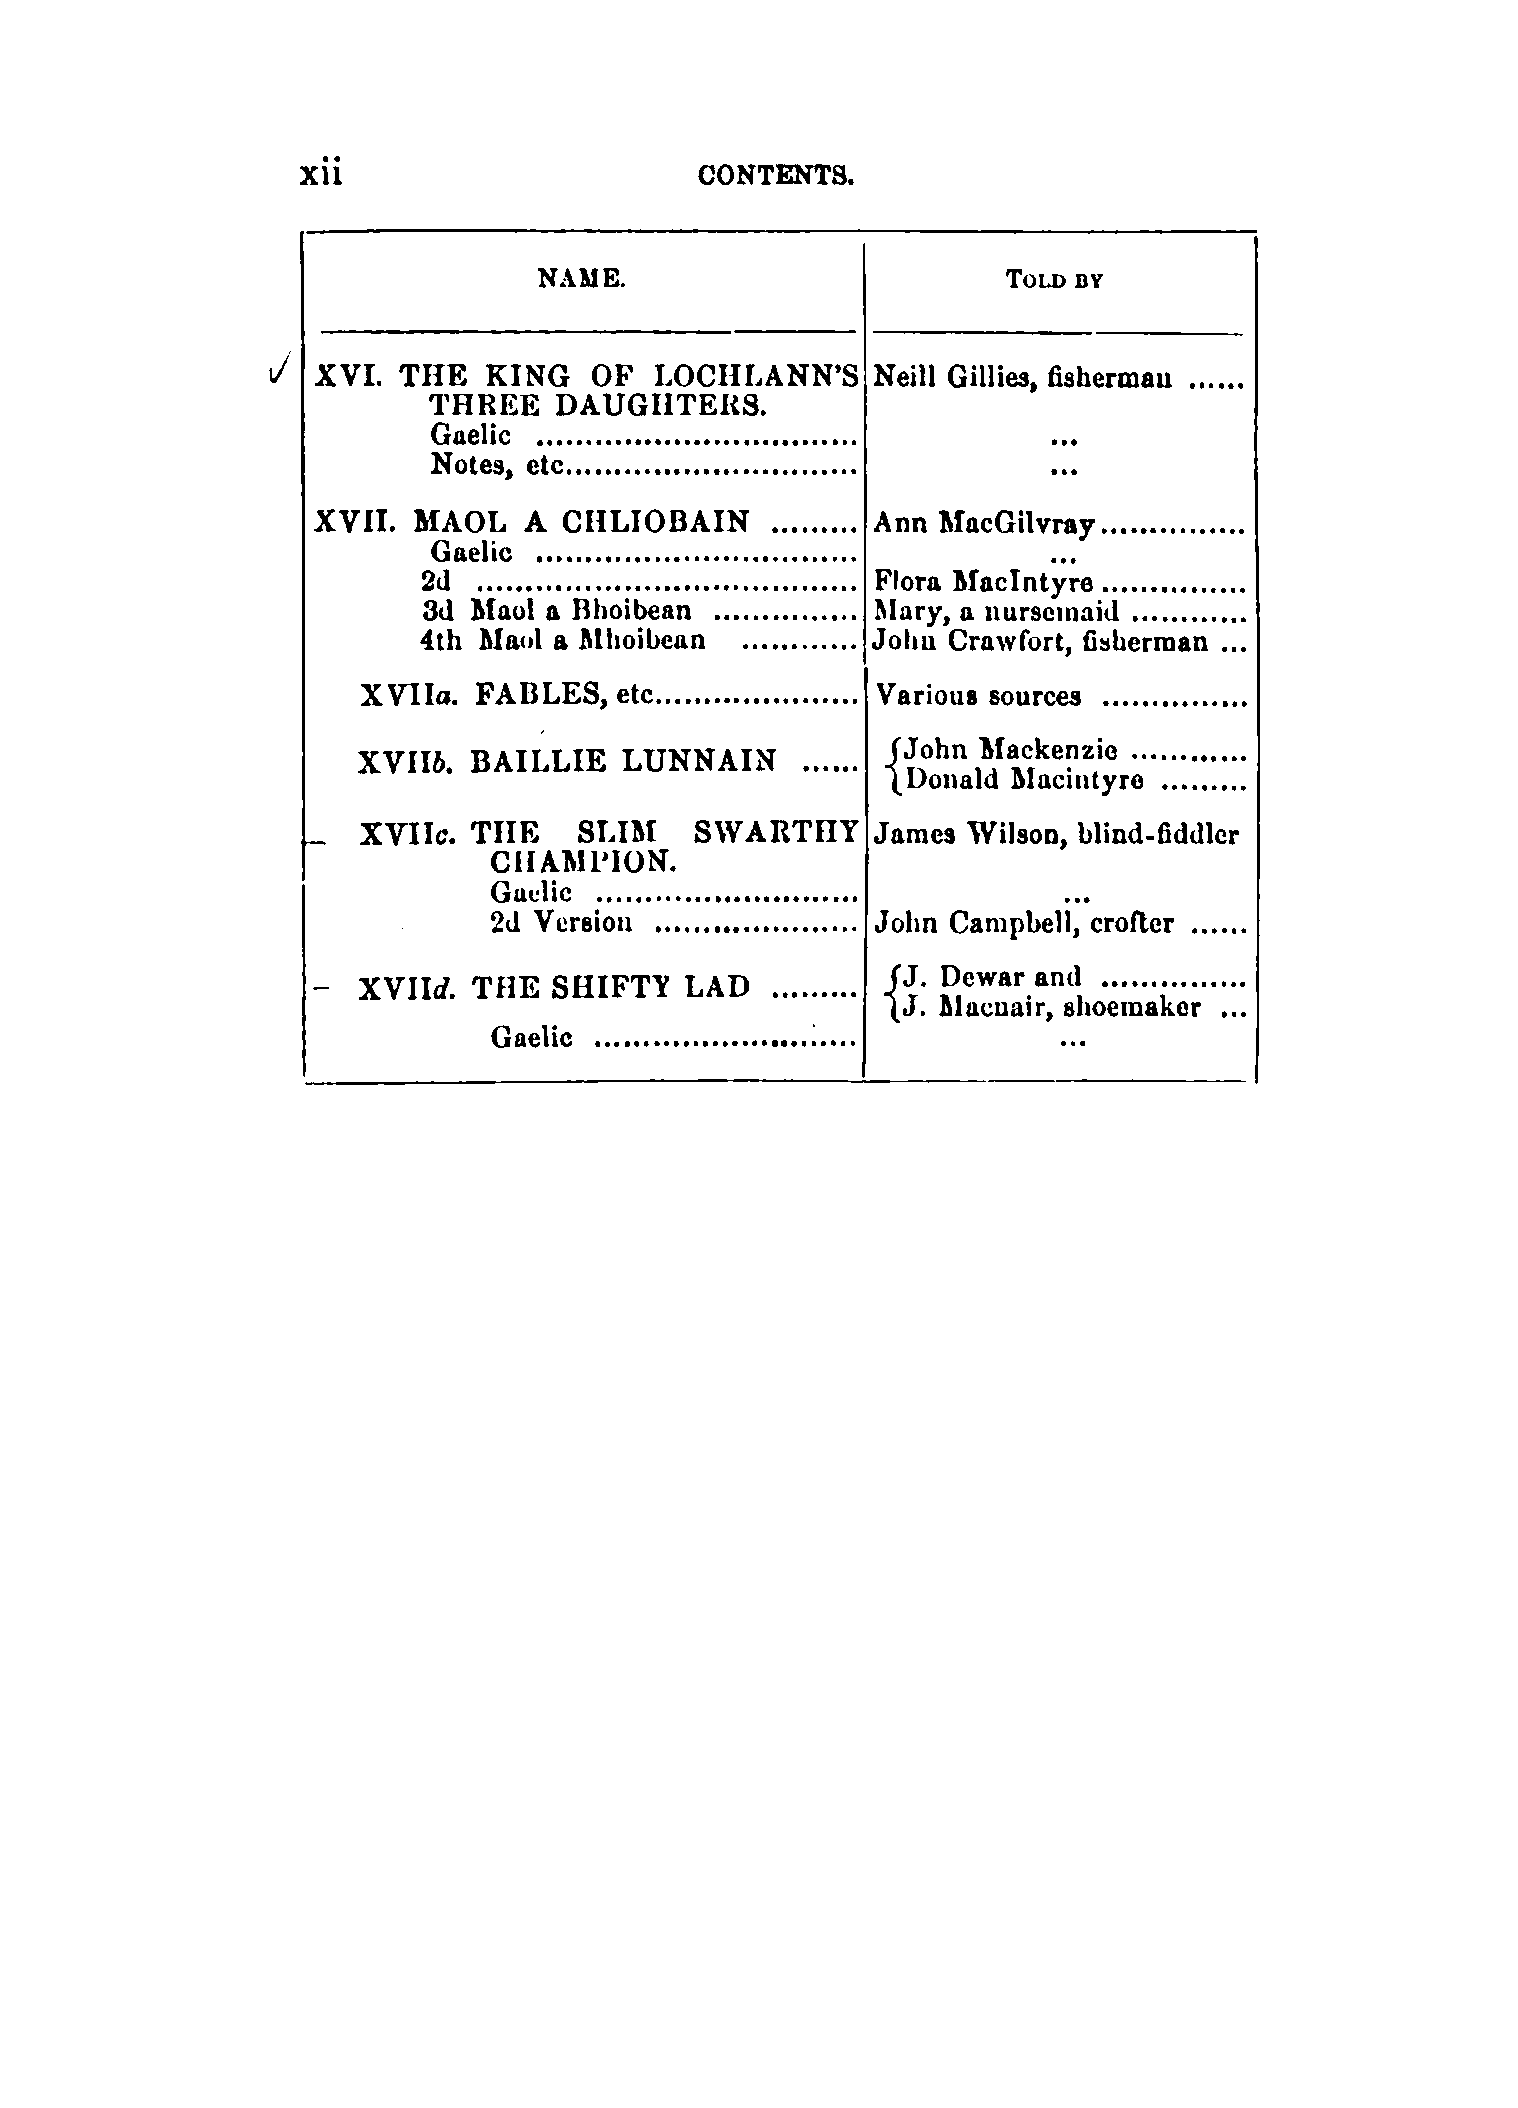

(venv) 

: 1

In [31]:
display < arch/images/Image_0019.png

In [ ]:
umount arch

In [32]:
qsubmit() {
    echo SUBMITTED JOB: "$*"
}

(venv) 

: 1

In [34]:
for shard in {000000..000025}; do
    qsubmit python3 binarize.py images-$shard.tar binarized-$shard.tar
done

SUBMITTED JOB: python3 binarize.py images-000000.tar binarized-000000.tar
SUBMITTED JOB: python3 binarize.py images-000001.tar binarized-000001.tar
SUBMITTED JOB: python3 binarize.py images-000002.tar binarized-000002.tar
SUBMITTED JOB: python3 binarize.py images-000003.tar binarized-000003.tar
SUBMITTED JOB: python3 binarize.py images-000004.tar binarized-000004.tar
SUBMITTED JOB: python3 binarize.py images-000005.tar binarized-000005.tar
SUBMITTED JOB: python3 binarize.py images-000006.tar binarized-000006.tar
SUBMITTED JOB: python3 binarize.py images-000007.tar binarized-000007.tar
SUBMITTED JOB: python3 binarize.py images-000008.tar binarized-000008.tar
SUBMITTED JOB: python3 binarize.py images-000009.tar binarized-000009.tar
SUBMITTED JOB: python3 binarize.py images-000010.tar binarized-000010.tar
SUBMITTED JOB: python3 binarize.py images-000011.tar binarized-000011.tar
SUBMITTED JOB: python3 binarize.py images-000012.tar binarized-000012.tar
SUBMITTED JOB: python3 binarize.py ima

: 1

In [38]:
gsutil cat gs://ocropus4-g1000/Volume_0000.tar |
python3 binarize.py - - |
gsutil cp - gs://tmb-temp/binarized-0000.tar

Copying from <STDIN>...
/ [1 files][    0.0 B/    0.0 B]      0.0 B/s                                   
Operation completed over 1 objects.                                              
(venv) 

: 1

In [39]:
gsutil cat gs://tmb-temp/binarized-0000.tar | tar tvf -| head

-r--r--r-- bigdata/bigdata 3943 2021-08-25 08:33 Volume_0000/Image_0000.png
-r--r--r-- bigdata/bigdata 18066 2021-08-25 08:33 Volume_0000/Image_0001.png
-r--r--r-- bigdata/bigdata  7475 2021-08-25 08:33 Volume_0000/Image_0002.png
-r--r--r-- bigdata/bigdata  7515 2021-08-25 08:33 Volume_0000/Image_0003.png
-r--r--r-- bigdata/bigdata  7463 2021-08-25 08:33 Volume_0000/Image_0004.png
-r--r--r-- bigdata/bigdata  7463 2021-08-25 08:33 Volume_0000/Image_0005.png
-r--r--r-- bigdata/bigdata  7463 2021-08-25 08:33 Volume_0000/Image_0006.png
-r--r--r-- bigdata/bigdata  7465 2021-08-25 08:33 Volume_0000/Image_0007.png
-r--r--r-- bigdata/bigdata 11127 2021-08-25 08:33 Volume_0000/Image_0008.png
-r--r--r-- bigdata/bigdata 14106 2021-08-25 08:33 Volume_0000/Image_0009.png
tar: write error
(venv) 

: 1

In [47]:
tar cf - Image_0000.jpg | python3 binarize.py - - | tar xvf -

Image_0000.png
(venv) 

: 1

In [ ]:
rm Image_00*.png

In [ ]:
rm Image_00*.jpg